In [26]:
import glob, json
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from lib import *

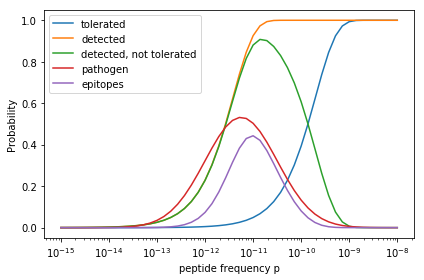

In [54]:
fig, ax = plt.subplots()
p = np.logspace(-15, -8)
nT = 1e7 * 500
ax.plot(p, 1-np.exp(- p * nT), label='tolerated')
nD = 1e7 * 9*8*19**2
ax.plot(p, 1-np.exp(- p * nD), label='detected')
ax.plot(p, (1-np.exp(- p * nD))*np.exp(- p * nT), label='detected, not tolerated')
k = 9
mu = -1.25
sigma = 0.25
ax.plot(p, scipy.stats.norm.pdf(np.log10(p), k*mu, k**.5*sigma), label='pathogen')
ax.plot(p, (1-np.exp(- p * nD))*np.exp(- p * nT)*scipy.stats.norm.pdf(np.log10(p), k*mu, k**.5*sigma), label='epitopes')
ax.legend(loc='upper left')
ax.set_xscale('log')
ax.set_xlabel('peptide frequency p')
ax.set_ylabel('Probability')
fig.tight_layout()
fig.savefig('plots/frequencywindow.png', dpi=300)